In [4]:
import numpy as np
import math
import helper as hp
from PIL import Image as im
np.set_printoptions(precision=3, suppress=True)

In [13]:
def pad(img, padding=2, mode='zeros'):
    padded = np.zeros((img.shape[0]+padding*2, img.shape[1]+padding*2), dtype=np.ubyte)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            padded[i+padding][j+padding] = img[i][j]
    return padded

def mat_mult(mat_1, mat_2):
    assert(mat_1.shape == mat_2.shape)
    return np.multiply(mat_1, mat_2).sum()

def apply_kernel(img, kernel):
    k_h,k_w = kernel.shape
    i_h,i_w = img.shape
    assert(k_h==k_w and k_h%2!=0)
    padding = int(k_h/2)
    padded_img = pad(img, padding)
    result = np.zeros_like(img)
    for i in range(i_h):
        for j in range(i_w):
            row_start, row_end = i, i+k_h
            col_start, col_end = j, j+k_w
            result[i][j] = mat_mult(padded_img[row_start:row_end, col_start:col_end], kernel)
    return result

In [11]:
def gaussian(img, kernel_size=3, sigma=2, k=1.67):
    assert(kernel_size % 2 != 0)
    kernel = np.zeros((kernel_size, kernel_size), dtype=np.float32)
    for i in range(kernel_size):
        for j in range(kernel_size):
            exponent = -((i-int(kernel_size/2))**2 + (j-int(kernel_size/2))**2)/((2)*sigma**2)
            kernel[i][j] = math.exp(exponent)*k
    kernel = kernel/kernel.sum()
    result = apply_kernel(img, kernel)
    return result

Image was written to lena-gaussian.raw


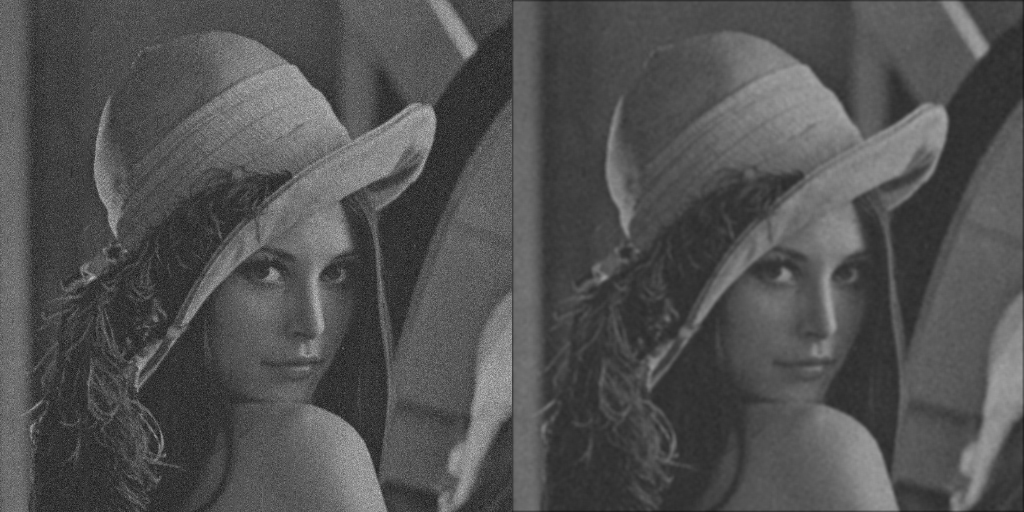

In [32]:
input = hp.read_8bit_img_from_raw_data('data/lena-noise.raw', 512, 512)
output = gaussian(input, kernel_size=5, sigma=2, k=1.67)
hp.write_8bit_img_to_raw_data(output, 'lena-gaussian.raw')
output = hp.read_8bit_img_from_raw_data('lena-gaussian.raw', 512, 512)
im.fromarray(np.concatenate((input.astype(np.ubyte), output.astype(np.ubyte)), axis=1))

Image was written to lena-sharpen.raw


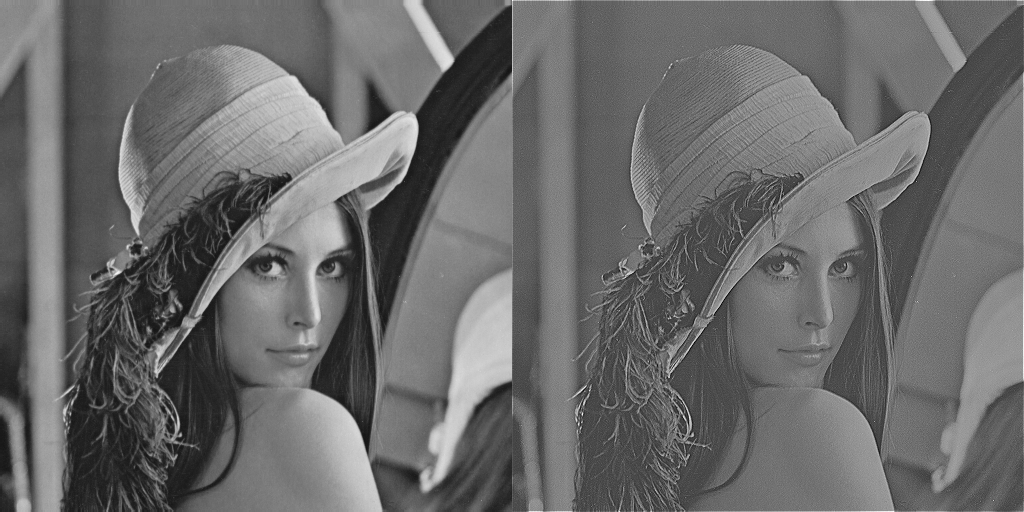

In [34]:
def laplacian(img):
    laplacian = np.array([[0, 1, 0],[1, -4, 1],[0, 1, 0]], dtype=np.float32)
    result = apply_kernel(img, laplacian)
    return result

def sharpen(img, laplacian, weight=1):
    return hp.normalize(img + weight * laplacian)
        
input = hp.read_8bit_img_from_raw_data('data/lena.raw', 512, 512)
output = laplacian(input)
output = sharpen(input, output, -1)
hp.write_8bit_img_to_raw_data(output,'lena-sharpen.raw')
output = hp.read_8bit_img_from_raw_data('lena-sharpen.raw', 512, 512)
im.fromarray(np.concatenate((hp.read_8bit_img_from_raw_data('data/lena.raw', 512, 512).astype(np.ubyte), output.astype(np.ubyte)), axis=1))

Image was written to lena-median.raw


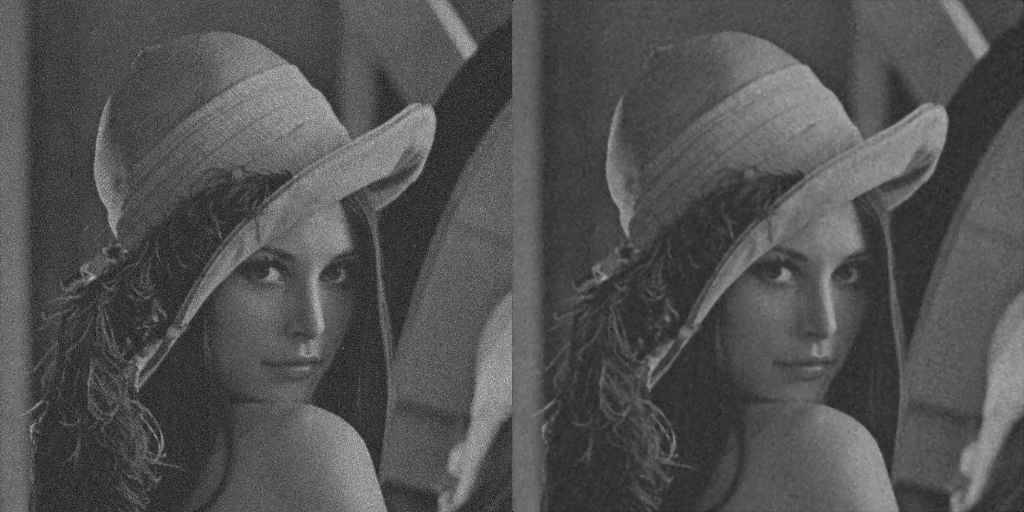

In [43]:
def median_filter(img, kernel_size=3):
    assert(kernel_size % 2 != 0)
    padded_img = pad(img, int(kernel_size/2))
    result = np.zeros_like(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            row_start, row_end = i, i+kernel_size
            col_start, col_end = j, j+kernel_size
            result[i][j] = np.median(padded_img[row_start:row_end, col_start:col_end])
    return result

input = hp.read_8bit_img_from_raw_data('data/lena-noise.raw', 512, 512)
output = median_filter(input, kernel_size=3)
hp.write_8bit_img_to_raw_data(output, 'lena-median.raw')
output = hp.read_8bit_img_from_raw_data('lena-median.raw', 512, 512)
im.fromarray(np.concatenate((input.astype(np.ubyte), output.astype(np.ubyte)), axis=1))